## Monthly Sales prediction of several items with Least Squares

## Load data

- Training data (salesdata1.txt): contains sales data for 5 items (i=1...5) over 24 months (t=1...24)
- Testing data (salestestdata.txt) : contain sales data for 5 items for months 25, 26,...,30.

In [1]:
salesdata = textread('salesdata1.txt');
salestestdata = textread('salestestdata.txt');

In [2]:
NumOfMonths = size(salesdata,2);
NumOfItems = size(salesdata,1);

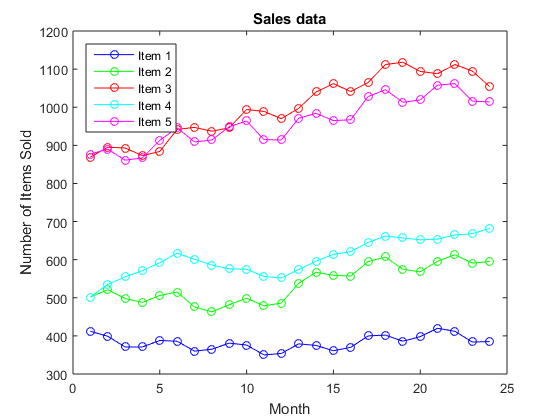

In [9]:
figure('Name','Sales Prediction with Basis Regression','NumberTitle','off');

col = {'b-o','g-o','r-o','c-o','m-o'};

% plot of salesdata
for i = 1:NumOfItems
    plot(salesdata(i,:),col{i});
    hold on
end

hleg = legend('Item 1','Item 2','Item 3','Item 4','Item 5');
set(hleg,'Location','northwest');
xlabel('Month'), ylabel('Number of Items Sold'), title('Sales data')

## Basis regression model

Basis regression model assuming that there is a constant term, linear trend and seasonal fluctutations (yearly, two-yearly and every 4 months).

In [4]:
t = (1:NumOfMonths)';       % months

%X = [cos(2*pi*t) sin(2*pi*t) cos(2*pi*t/2) sin(2*pi*t/2) cos(2*pi*4*t) sin(2*pi*4*t) t ones(size(t))];
%X = [cos(2*pi*t) cos(2*pi*t/2) cos(2*pi*4*t) t ones(size(t))];
X = [cos(t) sin(t) cos(t/2) sin(t/2) cos(4*t) sin(4*t) t ones(size(t))];
%X = [cos(t) cos(t/2) cos(4*t) t ones(size(t))];
%X = [ sin(t) sin(t/2) sin(4*t) t ones(size(t))];



% w(:,:,1):= NormE & w(:,:,2):= QR & w(:,:,3):= SVD
w = zeros(size(X,2),NumOfItems,3); 

%% Least Square with Normal Equations
for i = 1:NumOfItems
    %w_Normal(:,i) = (X'*X)\(X'*salesdata(i,:)');
    w(:,i,1) = X\salesdata(i,:)';
end

%% Least Square with QR decomposition
[Q , R] = qr(X,0);

for i = 1:NumOfItems
    w(:,i,2) = R\(Q'*salesdata(i,:)');
end

%% Least Square with SVD decomposition
[U , S , V] = svd(X,0);
for i = 1:NumOfItems
    w(:,i,3) = V * ((U'*salesdata(i,:)')./diag(S));
end

In [5]:
NumOfPredictedMonths = 6;

tt = (1:NumOfMonths+NumOfPredictedMonths)';       % months

%XX = [cos(2*pi*tt) sin(2*pi*tt) cos(2*pi*tt/2) sin(2*pi*tt/2) cos(2*pi*4*tt) sin(2*pi*4*tt) tt ones(size(tt))];
%XX = [cos(2*pi*tt) cos(2*pi*tt/2) cos(2*pi*4*tt) tt ones(size(tt))];
XX = [cos(tt) sin(tt) cos(tt/2) sin(tt/2) cos(4*tt) sin(4*tt) tt ones(size(tt))];
%XX = [cos(tt) cos(tt/2) cos(4*tt) tt ones(size(tt))];
%XX = [sin(tt) sin(tt/2) sin(4*tt) tt ones(size(tt))];

% predictedSales(:,:,1) = NormE & predictedSales(:,:,2) = QR & predictedSales(:,:,3) = SVD
predictedSales = zeros(NumOfItems,NumOfMonths+NumOfPredictedMonths,3);

for i=1:NumOfItems
    predictedSales(i,:,1) = XX*w(:,i,1);
    predictedSales(i,:,2) = XX*w(:,i,2);
    predictedSales(i,:,3) = XX*w(:,i,3);
end

## plot of sales data + predictedsalesdata

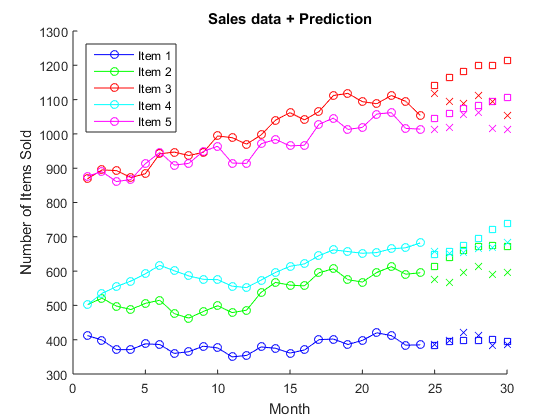

In [10]:
figure()

colNormal = {'bs','gs','rs','cs','ms'};
colQR = {'bo','go','ro','co','mo'};
%colSVD = {'b-','g€','r€','c€','m€'};
col2 = {'b','g','r','c','m'};

hold on

for i = 1:NumOfItems
    plot(t,salesdata(i,:),col{i});
end

% for i = 1:NumOfItems
%     plot(predictedSales(i,NumOfMonths+1:end,1),colNormal{i});
%     plot(predictedSales(i,NumOfMonths+1:end,2),colQR{i});
%     plot(predictedSales(i,NumOfMonths+1:end,3),'k+');   
% end

hleg = legend('Item 1','Item 2','Item 3','Item 4','Item 5');
set(hleg,'Location','northwest');
xlabel('Month'), ylabel('Number of Items Sold'), title('Sales data + Prediction')
hold on

for i = 1:NumOfItems
        plot((NumOfMonths+1:NumOfMonths+NumOfPredictedMonths),predictedSales(i,NumOfMonths+1:end,1),colNormal{i})
%       plot(tt,predictedSales(i,:,1),colNormal{i})
        plot((NumOfMonths+1:NumOfMonths+NumOfPredictedMonths),salestestdata(i,:), strcat(col2{i}, 'x'))
end

## Total relative error between predictions generated by different computational methods


In [7]:
relativeError = zeros(3);

for i=1:3
    for j=1:3
        for item = 1:NumOfItems
            relativeError(i,j) = relativeError(i,j) + norm(predictedSales(item,NumOfMonths+1:end,i)-predictedSales(item,NumOfMonths+1:end,j))/norm(predictedSales(item,NumOfMonths+1:end,j));
        end
    end
end

relativeError


relativeError =

   1.0e-13 *

         0    0.0092    0.1076
    0.0092         0    0.1017
    0.1076    0.1017         0




## Error calculation

In [8]:
error = zeros(NumOfItems+1,3);      % last row is sum
for i=1:NumOfItems
    error(i,1) = norm(salestestdata(i,:)-predictedSales(i,NumOfMonths+1:end,1));
    error(i,2) = norm(salestestdata(i,:)-predictedSales(i,NumOfMonths+1:end,2));
    error(i,3) = norm(salestestdata(i,:)-predictedSales(i,NumOfMonths+1:end,3));
end

error(NumOfItems+1,:) = sum(error(1:NumOfItems,:),1);
disp('Errors (Euclidean norm)')
error(:,1)     

predictedSales

Errors (Euclidean norm)

ans =

   32.5470
  165.7598
  241.2714
   85.8553
  134.4996
  659.9331


predictedSales(:,:,1) =

   1.0e+03 *

  Columns 1 through 13

    0.3735    0.3781    0.3755    0.3775    0.3753    0.3786    0.3873    0.3851    0.3822    0.3767    0.3680    0.3729    0.3795
    0.4693    0.4902    0.4988    0.5016    0.4977    0.4939    0.4945    0.4920    0.4905    0.4926    0.4986    0.5173    0.5424
    0.8699    0.8833    0.9009    0.9027    0.9133    0.9386    0.9474    0.9573    0.9578    0.9451    0.9574    0.9767    0.9990
    0.5064    0.5270    0.5472    0.5717    0.5890    0.5908    0.5916    0.5865    0.5799    0.5807    0.5756    0.5731    0.5797
    0.8593    0.8743    0.8832    0.8932    0.9068    0.9206    0.9348    0.9407    0.9368    0.9326    0.9306    0.9374    0.9529

  Columns 14 through 26

    0.3837    0.3905    0.3869    0.3845    0.3900    0.3914    0.3969    0.3978    0.3877    0.3839    0.3815    0.3830    0.3946
    0.5649    0.5829    0